In [316]:
# Importer les bibliothèques
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter
from sklearn.feature_selection import SelectKBest, f_regression
sns.set_style("whitegrid")  
%matplotlib inline 

In [318]:
# Charger les données
train = pd.read_csv("C:\\Users\\Dell\\house-price-prediction\\data\\cleaned data\\finaltrain.csv")
test = pd.read_csv("C:\\Users\\Dell\\house-price-prediction\\data\\cleaned data\\finaltest.csv")

In [320]:
# verification
print(f"Train shape: {train.shape}\nTest shape: {test.shape}")

Train shape: (1460, 217)
Test shape: (1459, 202)


In [322]:
# Afficher les 5 premières lignes pour vérification
print("Données d'entraînement :")
display(train.head())

Données d'entraînement :


,Id,LotFrontage,LotArea,Street,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,...,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr
0,1,-0.231877,-0.207142,0.064238,0.701291,0.02618,-0.225716,0.651479,-0.517200,1.050994,...,True,False,False,False,True,False,False,False,False,True
1,2,0.437043,-0.091886,0.064238,0.701291,0.02618,-0.225716,-0.071836,2.179628,0.156734,...,True,False,False,False,True,False,False,False,False,True
2,3,-0.098093,0.073480,0.064238,-1.016637,0.02618,-0.225716,0.651479,-0.517200,0.984752,...,True,False,False,False,True,False,False,False,False,True
3,4,-0.454850,-0.096897,0.064238,-1.016637,0.02618,-0.225716,0.651479,-0.517200,-1.863632,...,True,False,False,False,False,False,False,False,False,True
4,5,0.615421,0.375148,0.064238,-1.016637,0.02618,-0.225716,1.374795,-0.517200,0.951632,...,True,False,False,False,True,False,False,False,False,True


In [324]:
print("\nDonnées de test :")
display(test.head())


Données de test :


,Id,LotFrontage,LotArea,Street,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,...,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr
0,1461,0.526150,0.363929,0.06426,0.703009,0.0,-0.207992,-0.751101,0.400766,-0.340945,...,False,True,False,False,False,True,False,False,False,True
1,1462,0.573788,0.897861,0.06426,-1.090156,0.0,-0.207992,-0.054877,0.400766,-0.439695,...,False,True,False,False,False,True,False,False,False,True
2,1463,0.240326,0.809646,0.06426,-1.090156,0.0,-0.207992,-0.751101,-0.497418,0.844059,...,False,True,False,False,False,True,False,False,False,True
3,1464,0.430876,0.032064,0.06426,-1.090156,0.0,-0.207992,-0.054877,0.400766,0.876976,...,False,True,False,False,False,True,False,False,False,True
4,1465,-1.236435,-0.971808,0.06426,-1.090156,0.0,-0.207992,1.337571,-0.497418,0.679475,...,False,True,False,False,False,True,False,False,False,True


In [326]:
# Colonnes de qualité disponibles 
quality_cols = ['OverallQual', 'KitchenQual', 'ExterQual', 'BsmtQual']

# Vérification et calcul
available_quality_cols = [col for col in quality_cols if col in train.columns]

if available_quality_cols:
    # Conversion des évaluations catégorielles en scores numériques
    qual_mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, np.nan: 0}
    
    for col in available_quality_cols:
        if train[col].dtype == 'object':
            train[col] = train[col].map(qual_mapping).fillna(0)
    
    # Calcul du score total
    train['TotalQual'] = train[available_quality_cols].sum(axis=1)
    print("✅ Score de qualité calculé avec succès")
else:
    print("❌ Aucune colonne de qualité valide trouvée. Colonnes disponibles:")
    print([col for col in train.columns if 'Qual' in col])

✅ Score de qualité calculé avec succès


In [328]:
print("Colonnes disponibles dans le DataFrame :")
print(train.columns.tolist())

# Vérification spécifique
print("\nColonne 'Neighborhood' existe-t-elle ?", 'Neighborhood' in train.columns)
print("Colonne 'SalePrice' existe-t-elle ?", 'SalePrice' in train.columns)

Colonnes disponibles dans le DataFrame :
['Id', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Alley_NA', 'Alley_Pave', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'LotConfig_CulDS

In [330]:
if 'Neighborhood' in train.columns:
    print("\nValeurs uniques dans 'Neighborhood':")
    print(train['Neighborhood'].unique())
    
    print("\nNombre de valeurs manquantes:", train['Neighborhood'].isna().sum())

In [332]:
if 'Neighborhood' not in train.columns:
    print("\nTentative de création de la colonne Neighborhood...")
    
    # Méthode 1 : Vérification des colonnes one-hot
    neighborhood_cols = [col for col in train.columns if col.startswith('Neighborhood_')]
    
    if neighborhood_cols:
        print(f"Détection de {len(neighborhood_cols)} colonnes de quartier (one-hot)")
        train['Neighborhood'] = train[neighborhood_cols].idxmax(axis=1)
        train['Neighborhood'] = train['Neighborhood'].str.replace('Neighborhood_', '')
    else:
        # Méthode 2 : Recherche de noms similaires
        possible_cols = [col for col in train.columns if 'quartier' in col.lower() or 'neigh' in col.lower()]
        
        if possible_cols:
            print(f"Colonne alternative trouvée: utilisant {possible_cols[0]}")
            train['Neighborhood'] = train[possible_cols[0]]
        else:
            print("Aucune colonne de quartier identifiée")
            print("Colonnes disponibles:", train.columns.tolist())


Tentative de création de la colonne Neighborhood...
Détection de 24 colonnes de quartier (one-hot)


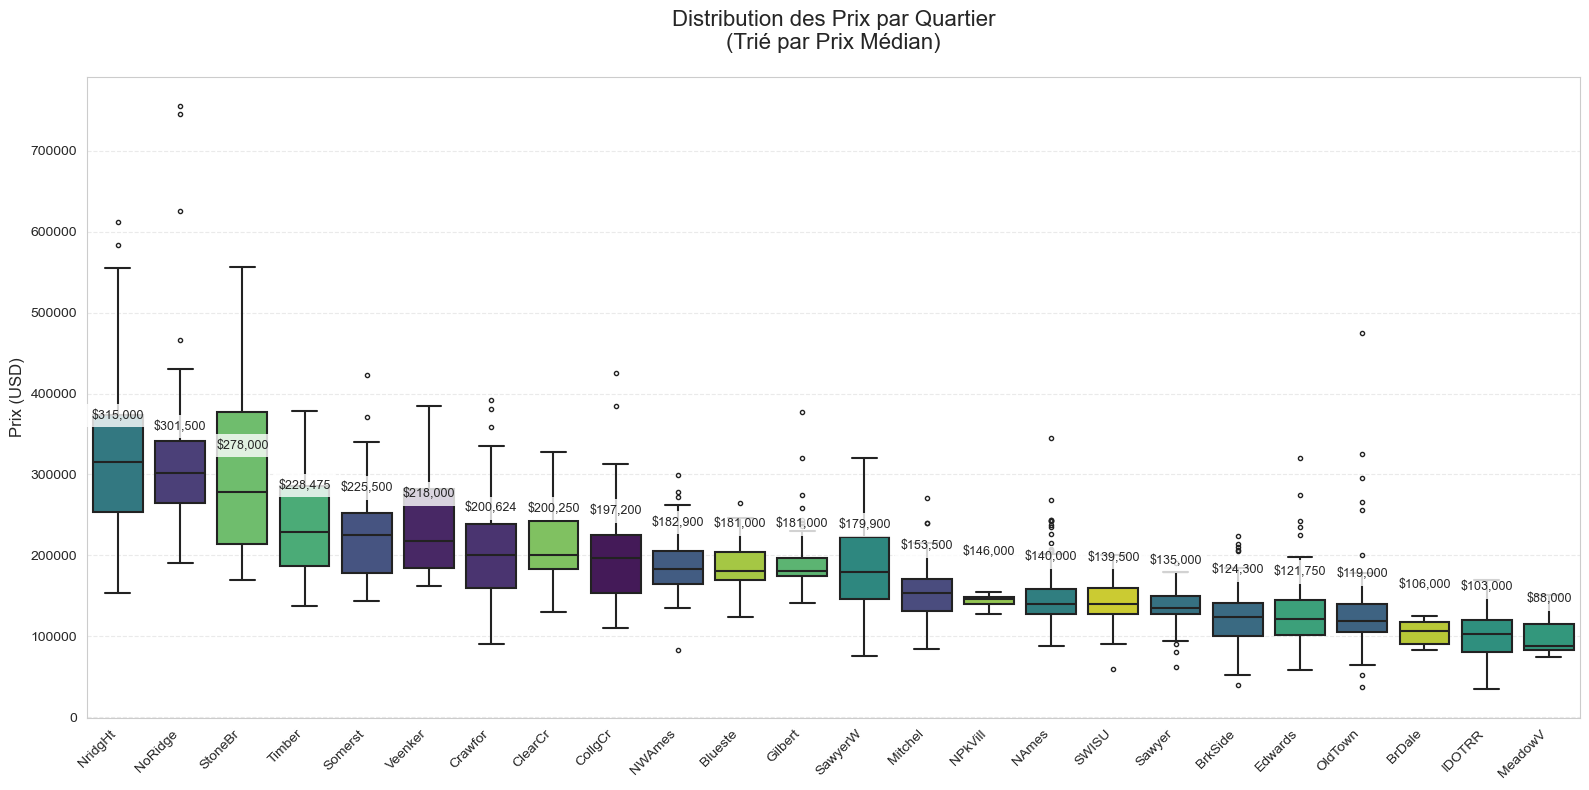

In [334]:
plt.figure(figsize=(16, 8))

# Version corrigée avec hue et legend=False
ax = sns.boxplot(
    x='Neighborhood',
    y='SalePrice',
    data=train,
    order=neighborhood_order,
    hue='Neighborhood',  # Ajouté pour corriger le warning
    palette='viridis',
    legend=False,       # Désactive la légende inutile
    linewidth=1.5,
    fliersize=3
)

# Personnalisation avancée
plt.title('Distribution des Prix par Quartier\n(Trié par Prix Médian)', 
          fontsize=16, pad=20)
plt.xlabel('')
plt.ylabel('Prix (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.4)

# Annotation des prix médians
median_prices = train.groupby('Neighborhood')['SalePrice'].median()
for i, neighborhood in enumerate(neighborhood_order):
    ax.text(i, median_prices[neighborhood]+50000, 
            f'${median_prices[neighborhood]:,.0f}',
            ha='center', va='bottom', fontsize=9,
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

plt.tight_layout()
plt.show()

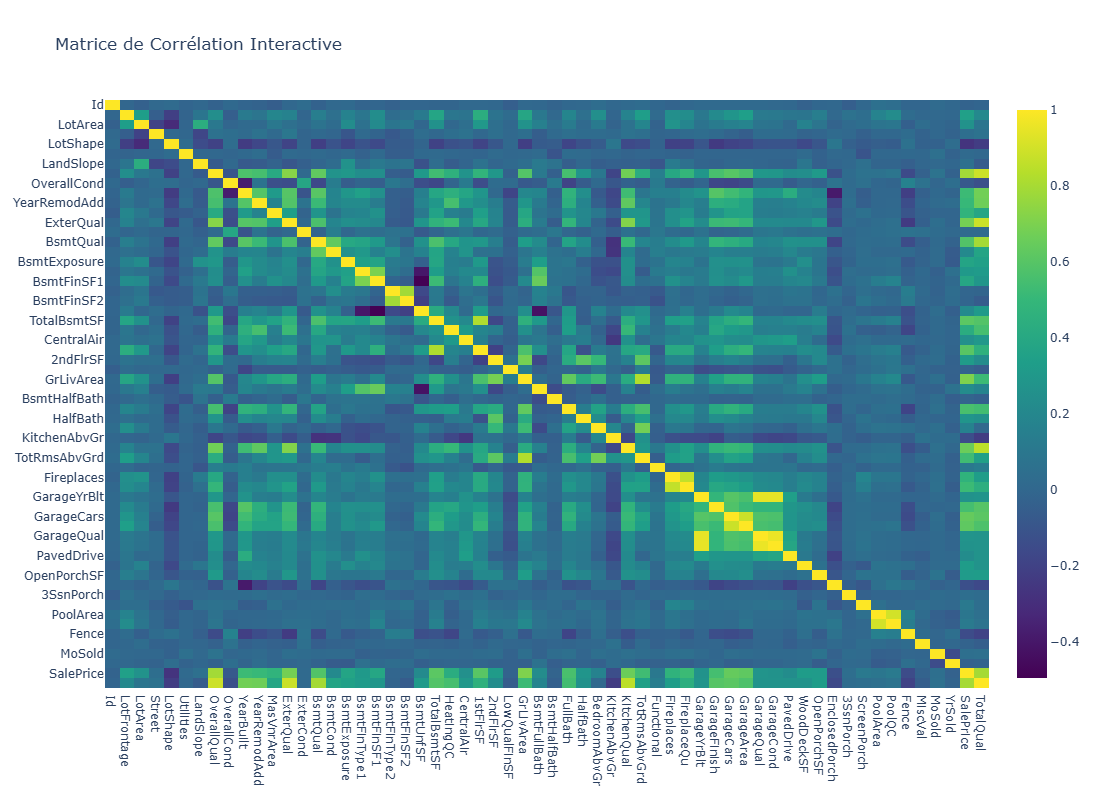

In [335]:
# Sélection des variables numériques
numeric_cols = train.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = train[numeric_cols].corr()

# Heatmap interactif avec Plotly
import plotly.express as px
fig = px.imshow(
    corr_matrix,
    color_continuous_scale='viridis',
    aspect="auto",
    title='Matrice de Corrélation Interactive'
)
fig.update_layout(width=1000, height=800)
fig.show()

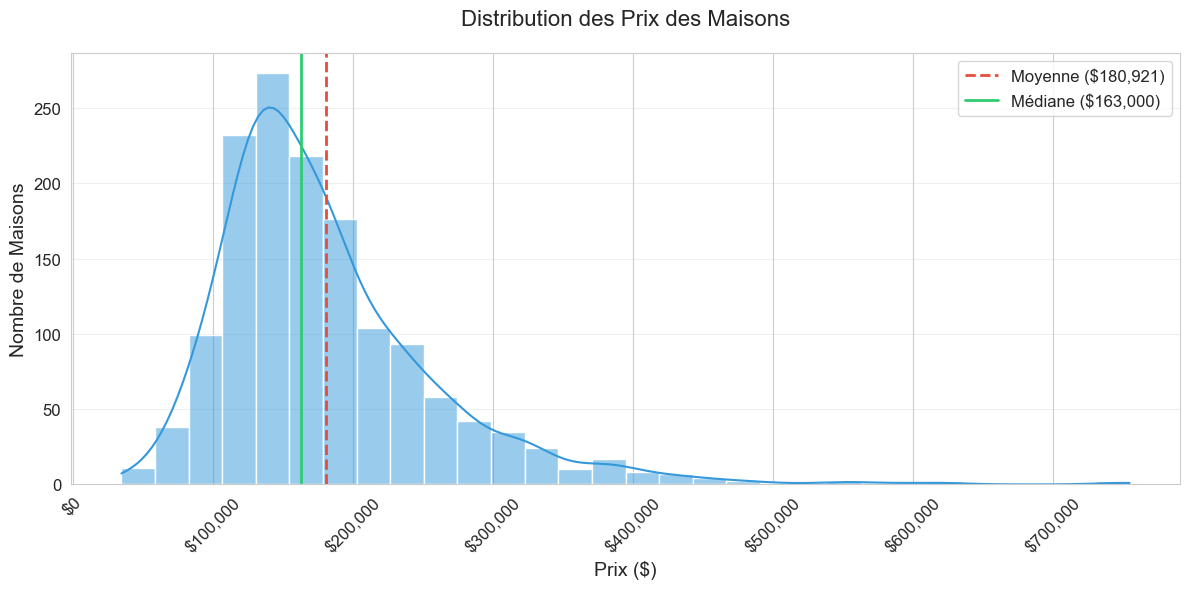

In [338]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(12, 6))
ax = sns.histplot(train['SalePrice'], bins=30, kde=True, color='#3498db')

# Calcul des statistiques
mean_price = train['SalePrice'].mean()
median_price = train['SalePrice'].median()

# Ajout des lignes de référence
plt.axvline(mean_price, color='#e74c3c', linestyle='--', linewidth=2, 
            label=f'Moyenne (${mean_price:,.0f})')
plt.axvline(median_price, color='#2ecc71', linestyle='-', linewidth=2, 
            label=f'Médiane (${median_price:,.0f})')

# Formatage de l'axe X en dollars
def dollar_formatter(x, pos):
    return '${:,.0f}'.format(x)

ax.xaxis.set_major_formatter(FuncFormatter(dollar_formatter))

# Paramètres visuels
plt.title('Distribution des Prix des Maisons', fontsize=16, pad=20)
plt.xlabel('Prix ($)', fontsize=14)
plt.ylabel('Nombre de Maisons', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.legend(fontsize=12)
plt.tight_layout()

plt.show()

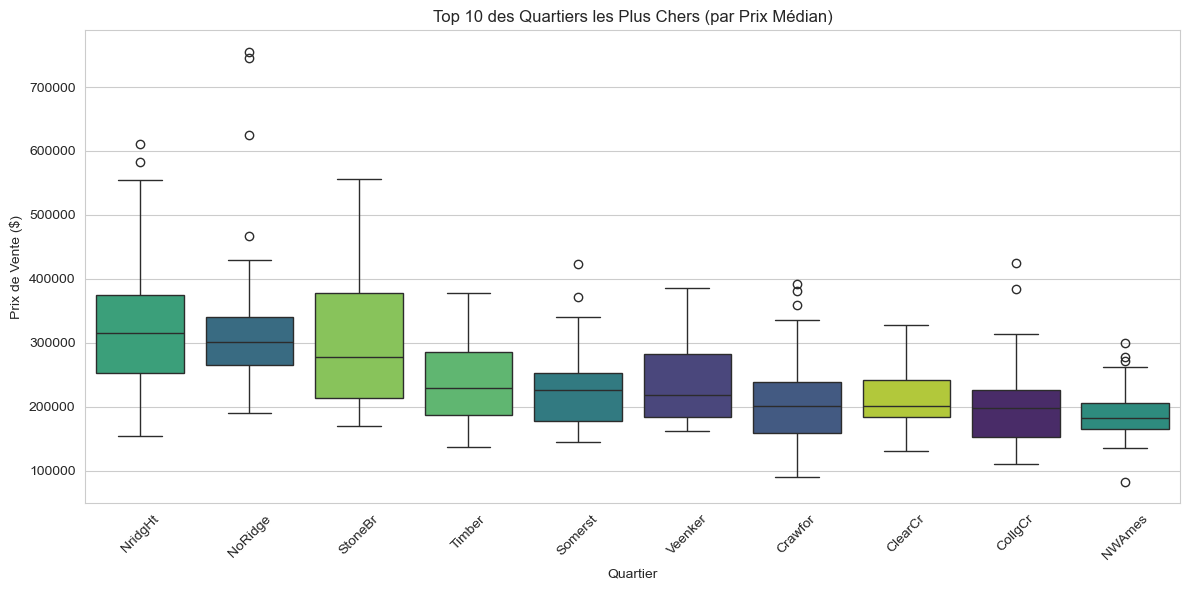

In [340]:
# Vérification et création de la colonne si nécessaire
if 'Neighborhood' not in train.columns:
    neighborhood_cols = [col for col in train.columns if col.startswith('Neighborhood_')]
    if neighborhood_cols:
        train['Neighborhood'] = train[neighborhood_cols].idxmax(axis=1)
        train['Neighborhood'] = train['Neighborhood'].str.replace('Neighborhood_', '')

# Vérification finale avant traitement
if 'Neighborhood' in train.columns and 'SalePrice' in train.columns:
    # Calcul des quartiers les plus chers
    top_neighborhoods = (train.groupby('Neighborhood')['SalePrice']
                          .median()
                          .sort_values(ascending=False)
                          .head(10)
                          .index)
    
    # Visualisation
    plt.figure(figsize=(12, 6))
    sns.boxplot(
        x='Neighborhood',
        y='SalePrice',
        data=train[train['Neighborhood'].isin(top_neighborhoods)],
        order=top_neighborhoods,
        palette='viridis',
        hue='Neighborhood',
        legend=False
    )
    plt.title('Top 10 des Quartiers les Plus Chers (par Prix Médian)')
    plt.xlabel('Quartier')
    plt.ylabel('Prix de Vente ($)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Colonnes manquantes pour l'analyse. Vérifiez 'Neighborhood' et 'SalePrice'")
    print("Colonnes disponibles:", list(train.columns))

In [342]:
def remove_outliers(df, col, threshold=1.5):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[col] >= Q1 - threshold*IQR) & 
             (df[col] <= Q3 + threshold*IQR)]

# Application sur les variables clés
clean_data = train.copy()
for col in ['SalePrice', 'GrLivArea', 'TotalBsmtSF']:
    clean_data = remove_outliers(clean_data, col)

In [344]:

numeric_features = ['TotalQual', 'GrLivArea', 'TotalBsmtSF']
categorical_features = ['Neighborhood', 'HouseStyle']

# Pipeline complet avec gestion des erreurs
try:
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', Pipeline([
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())
            ]), numeric_features),
            ('cat', Pipeline([
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OneHotEncoder(handle_unknown='ignore'))
            ]), categorical_features)
        ])
    
    print("Pipeline créé avec succès!")
    
except NameError as e:
    print(f"Erreur: {e}. Vérifiez vos importations.")
except Exception as e:
    print(f"Erreur inattendue: {e}")

Pipeline créé avec succès!


In [346]:
train.info()
train.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 219 entries, Id to Neighborhood
dtypes: bool(158), float64(58), int64(2), object(1)
memory usage: 921.2+ KB


,Id,LotFrontage,LotArea,Street,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,...,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,TotalQual,Neighborhood
count,1460.000000,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,...,1460,1460,1460,1460,1460,1460,1460,1460,1.460000e+03,1460
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2,2,2,2,2,2,2,NaN,24
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,True,False,False,False,False,True,NaN,NAmes
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1448,1440,1198,1335,1433,1457,1459,1335,NaN,225
mean,730.500000,2.865288e-16,-4.866731e-17,5.669742e-16,3.723049e-16,9.587460e-16,-1.703356e-16,1.265350e-16,3.370211e-16,1.032964e-15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6.618754e-16,NaN
std,421.610009,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.413384e+00,NaN
min,1.000000,-2.194041e+00,-9.237292e-01,-1.556706e+01,-4.452492e+00,-3.819686e+01,-2.257161e-01,-3.688413e+00,-4.112970e+00,-3.287824e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.238021e+01,NaN
25%,365.750000,-4.548501e-01,-2.969908e-01,6.423821e-02,-1.016637e+00,2.618016e-02,-2.257161e-01,-7.951515e-01,-5.171998e-01,-5.719226e-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.813999e+00,NaN
50%,730.500000,-8.903656e-03,-1.040633e-01,6.423821e-02,7.012910e-01,2.618016e-02,-2.257161e-01,-7.183611e-02,-5.171998e-01,5.737148e-02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.493631e-01,NaN
75%,1095.250000,4.370428e-01,1.087080e-01,6.423821e-02,7.012910e-01,2.618016e-02,-2.257161e-01,6.514792e-01,3.817427e-01,9.516316e-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.022944e+00,NaN


In [348]:
# Vérification des colonnes
missing_num = [col for col in numeric_features if col not in train.columns]
missing_cat = [col for col in categorical_features if col not in train.columns]

if missing_num or missing_cat:
    print("Avertissement: Colonnes manquantes")
    if missing_num:
        print(f"Numériques manquantes: {missing_num}")
    if missing_cat:
        print(f"Catégorielles manquantes: {missing_cat}")
    
    # Suggestions de colonnes similaires
    print("\nColonnes numériques disponibles:", [col for col in train.select_dtypes(include=['number']).columns])
    print("\nColonnes catégorielles disponibles:", [col for col in train.select_dtypes(include=['object']).columns])
else:
    print("Toutes les colonnes nécessaires sont présentes")

Avertissement: Colonnes manquantes
Catégorielles manquantes: ['HouseStyle']

Colonnes numériques disponibles: ['Id', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'TotalQual']

Colonnes catégorielles disponibles: ['Neighborhood']
